# Data Visulaizaton for Youtube Channels
-------------
# Sepideh Khalafi
----------------
The datset is from [Kaggle](https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels)

It contains data from the top 1000 youtube subscreibed channels.

In this pipeline we will see data exploration and cleaning, then some issues and the solution and visualization relating to them.

**I have taken into account if the audience should be colorblind**

In the end there are conclusion and references.

------------------------------
## importing libraries

* **pandas** and **numpy** are used for manipulating data
* **io** and **google.colab.files** are used to upload datset
* the other libraries are for visulaization
* the magic command is for the plots to be drawn right after the command cell embeding a PNG image in the notebook.

In [ ]:
import pandas
import numpy
from google.colab import files
import io
import matplotlib.pyplot
import seaborn

%matplotlib inline

# Data Acquisition

In [ ]:
uploaded = files.upload()
youtube = pandas.read_csv(io.BytesIO(uploaded['topSubscribed.csv']))

Saving topSubscribed.csv to topSubscribed.csv


# Data Exploration and Cleaning


Using *head* method we can have a short look at the dataset and it's features.

In [ ]:
youtube.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


- There are some cells with some information missing. But we will not eliminate or rewrite the **0** values since we are exploring and not doing machine learning projects. These rows do have important information in other features like **Subscribers**. So we will either use the information given or not use it at all depending on the problem.
- The numbers given are most likely in *object* format, meaning *string* datatype. We will check for sure and deal with it.
- Also they have **,** cahracter which needs to be eliminated before changing the type of the features.

For now we will do some more exploration using *info* method.

In [ ]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


- As suspected, the features **Subscribers**, **Video Views**, and **Video Count** are strings and we need to chenge them to numeric values.
- There is also no *null* values in the dataset.

We can use **replace** and **astype** to eliminate the **,** and change the type into **int64** as the other features.

In [ ]:
youtube['Subscribers'] = youtube['Subscribers'].str.replace(',', '').astype('int64')
youtube['Video Views'] = youtube['Video Views'].str.replace(',', '').astype('int64')
youtube['Video Count'] = youtube['Video Count'].str.replace(',', '').astype('int64')
youtube.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012



I wish to see the number of unique values in each feature using *nunique* method

In [ ]:
youtube.nunique()

Rank               1000
Youtube Channel     999
Subscribers         282
Video Views         992
Video Count         857
Category             19
Started              18
dtype: int64

What is imporatnt here is that there are 19 different *categories* and the starting years of the cahnnels are *18* different ones.


Now it is better to check the categories of the cahnnels. Using **unique** method we can find out about the unique values of this feature. But I prefer to see the count of them too. So, I use another command which is **value_counts** to see both unique values and the number of each of them.

In [ ]:
youtube['Category'].value_counts()

Entertainment                                                                   238
Music                                                                           217
People & Blogs                                                                  132
Gaming                                                                           94
Comedy                                                                           68
Film & Animation                                                                 50
Education                                                                        45
Howto & Style                                                                    43
https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels     30
News & Politics                                                                  27
Science & Technology                                                             18
Shows                                                                       

- There is a link in the list and if you click on it it goes to a page that shows these 1000 channels. So, it is not a category and we should skip these rows.
- Also some categories are related and it is better to merge them into one. There could be different solutions to that, but I will merge **Film & Animatoin** into **movies**, and **comedy** into **Entertainment**. Considering that these comedies could be stand up and not movies. Also not merging **Shows** because they might be sitcoms or series.

In [ ]:
youtube = youtube.drop(youtube[youtube.Category == 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels'].index)
youtube['Category'].value_counts()

Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          50
Education                 45
Howto & Style             43
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: Category, dtype: int64

The link is dropped

In [ ]:
youtube['Category'] = youtube['Category'].replace(to_replace = {'Film & Animation': 'Movies', 'Comedy': 'Entertainment'})
youtube['Category'].value_counts()

Entertainment            306
Music                    217
People & Blogs           132
Gaming                    94
Movies                    52
Education                 45
Howto & Style             43
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Autos & Vehicles           1
Travel & Events            1
Name: Category, dtype: int64

And now we have reduced the number of categories into **16** deifferent ones.

------------------
### Exploratory visualizations


First let's see if there is any correlation in the dataset using **heatmap**. To see the numbers helps us clearly understand the correlation (setting *annot* to *True*.

*cmap* is for the color

<Axes: >

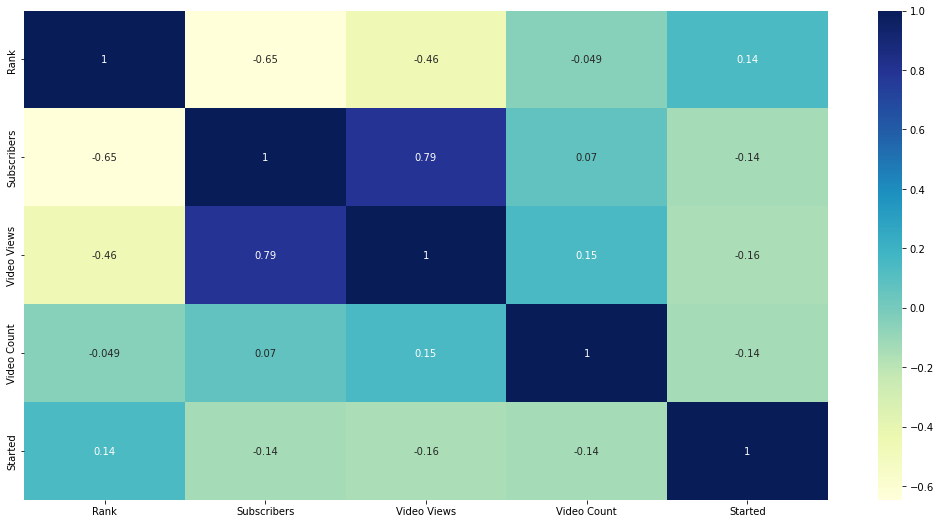

In [ ]:
matplotlib.pyplot.figure(figsize = (18, 9))
seaborn.heatmap(youtube.corr(), annot = True, cmap = 'YlGnBu')

- It shows taht number of subscribers and views of the videos on the channle are related. So, the more subscribers could lead to more views and vice versa.

We can also see relations pair-wise using a **pairplot**. To enlarge the plots we can use *height* which used to be *size*. I used a scatter plot between differnt features and a histogram for each one with itself.

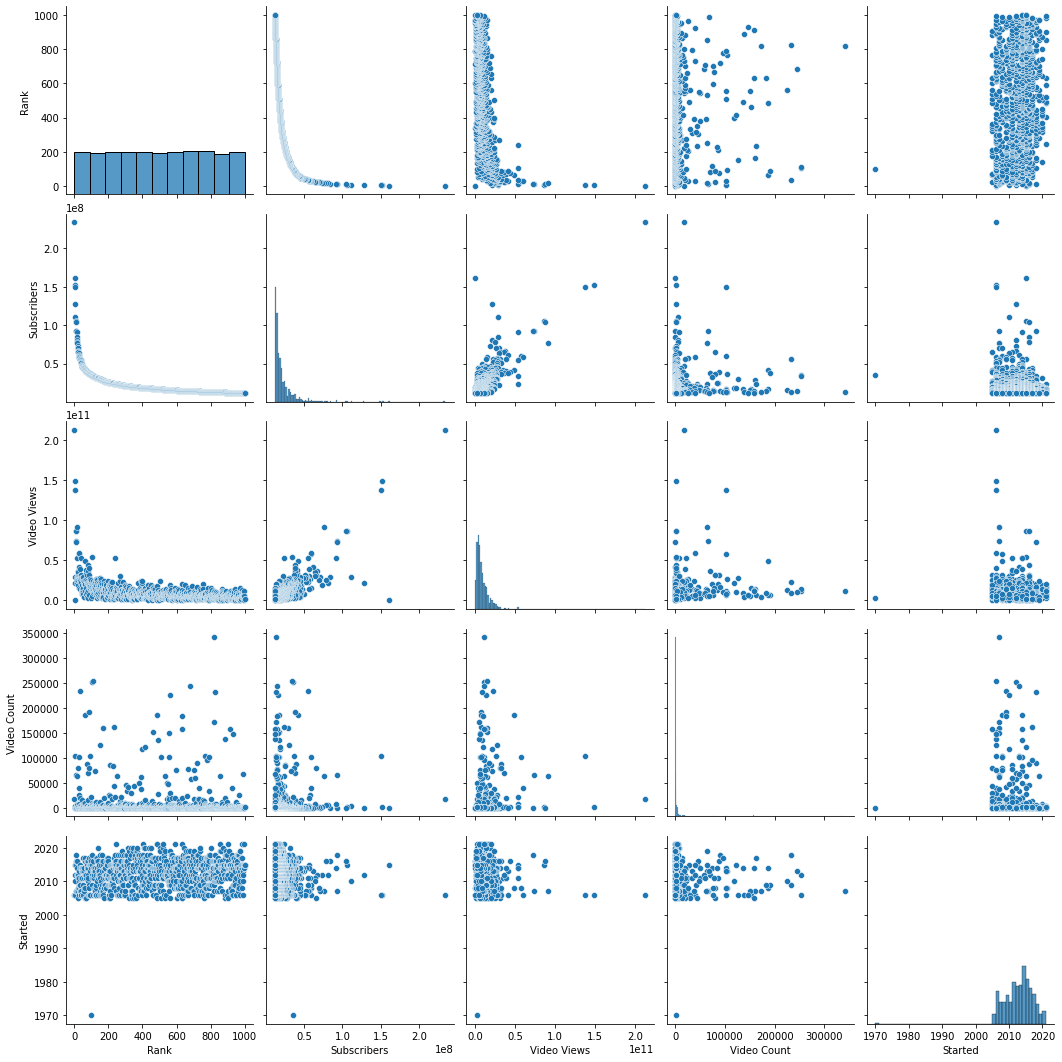

In [ ]:
seaborn.pairplot(youtube, kind = 'scatter', diag_kind = 'hist', height = 3) # kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}
matplotlib.pyplot.show()

- There is a channel started in 1970 which is ranked in almost the first 100 top subscribers. It is an outlier and totally wrong. I will drop it.
- Acording to the charts, having the most number of videos might not necessarily mean that they have the most subscribers. But the number of views can contribute to that.
- In terms of the number of the subscribers, the highest ones have much more subscribers than the rest.
- It seems that there are a few **0** values.


In [ ]:
youtube = youtube.drop(youtube[youtube.Started == 1970].index)

----------------------------------------

# First Business Problem (first two visuals)

Our client is a language school and wants to start a youtube channel for teaching a language. They want to know if there is enough target availabe for this kind of material and if people subscribe to educational channels, and also how much competition they will face.

We need to analyze the number of channels in different categories and forcus on *Educational* ones.

To have a simple and informative visual, we can use **bar charts** and easily be able to compare them.

To avoid clutter, we will eliminate broders and grid lines and ticks of both axis. And also to have the client's attention we can use colors for the focused bar.





defining a function would help to draw a bar chart whenever we want.

I defined 4 parameters for it:

- **values** for x axis values
- **counts** for y axis values
- **xlabel** for the x axis legend
- **ylabel** for the y axis legend

because the values of the X axis are a bit long, I positioned them to be *vertical*.

it returns the lsit of the bars, so that later we can use them in our other functions.

In [ ]:
def bar_chart(values, counts, xlabel, ylabel):

  matplotlib.pyplot.figure(figsize = (20, 10))
  barlist = matplotlib.pyplot.bar(values, counts, align = 'center')
  matplotlib.pyplot.xticks(rotation = 'vertical', fontsize = 15)
  matplotlib.pyplot.xlabel(xlabel, fontsize = 15)
  matplotlib.pyplot.ylabel(ylabel, fontsize = 15)

  return barlist

If we decide to remove x and y axis labels and ticks, we can use the following function. Using *tick_params* we can manipulate the parameters of the chosen axis. Here we have defined that The ticks of the both axis will not be shown and also the tick labels of the *y axis*.

In [ ]:
def remove_ticks_and_labels():
    matplotlib.pyplot.tick_params(
        axis = 'x',
        bottom = False)
    matplotlib.pyplot.tick_params(
        axis = 'y',
        left = False,
        labelleft = False)

just like before, we can define a function to remove borders too.

In [ ]:
def remove_frame():
    for spine in matplotlib.pyplot.gca().spines.values():
        spine.set_visible(False)

to have audiences attention to one bar we can change the colour of that bar using the folowing function. it gets the **barlist**(the bar chart) and **the number of the bar** which we want to focus on, as parameters.

In [ ]:
def change_bar_colors(barlist, i):
    for bar in barlist:
        bar.set_color('grey')
    barlist[i].set_color('navy')

Now if we want to print the values of y axis on the bars we can use the folowing function with takes the vaues of y axis as parameter.

In **text** method we have to define the position of the text and the text itself.

In [ ]:
def add_direct_labels(counts):
    rects = matplotlib.pyplot.gca().patches

    for rect, label in zip(rects, counts):
        font = {'weight': 'normal',
                'size': 16
               }
        height = rect.get_height()
        matplotlib.pyplot.gca().text(rect.get_x() + rect.get_width() / 2,
                       height + 5,
                       str(label),
                       fontdict = font,
                       ha = 'center',
                       va = 'bottom',
                       color = 'black')

Now that we have deifned the needed functions let define the variables and draw the charts.

- using **unique** we can find the names or values of the channels.
- using **value_counts** we can have the number of each value represented in the *Category* column

In [ ]:
category_counts = youtube['Category'].value_counts()
category_values = youtube['Category'].unique()
xlegend = 'Categories of the channels'
ylegend = 'number of the channels in that category'

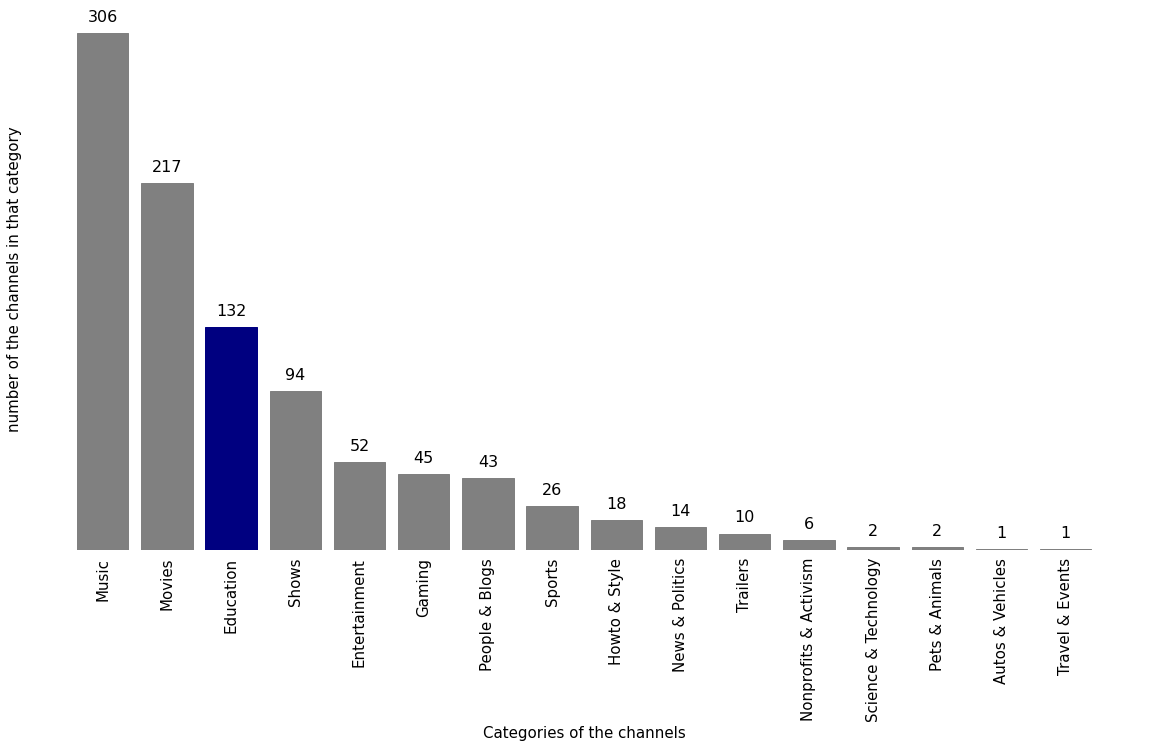

In [ ]:
barlist = bar_chart(category_values, category_counts, xlegend, ylegend)
remove_ticks_and_labels()
remove_frame()
change_bar_colors(barlist, 2)
add_direct_labels(category_counts)

Among the top subscribed channels the third one belongs to *Education* and our client has a very good chance to start their channel. There are 132 differnt favorite channels in education.

For the second part of their question we need to find the number of subscribers in this category. Using *groupby* and applying *sum* it is easy to calculate.



In [ ]:
group = youtube.groupby(['Category']).sum()
group

,Rank,Subscribers,Video Views,Video Count,Started
Category,,,,,
Autos & Vehicles,381,18900000,7666147546,2908,2013
Education,20494,1133600000,638114991185,132120,90623
Entertainment,157785,6024600000,2643572873798,3061123,615881
Gaming,49267,1873900000,671374062722,421461,189198
Howto & Style,25097,782300000,195253359938,86388,86580
Movies,21457,1323200000,532249961776,148737,104659
Music,97527,5224800000,3058929450985,536548,436328
News & Politics,13953,484100000,249736876791,3067910,52281
Nonprofits & Activism,752,51700000,9693759464,195681,4025


In [ ]:
number_of_edu_subscribers = group['Subscribers'].loc['Education']
number_of_edu_subscribers

1133600000

There are 1,133,600,000 subscribers in total in the most subscribed educational channels.

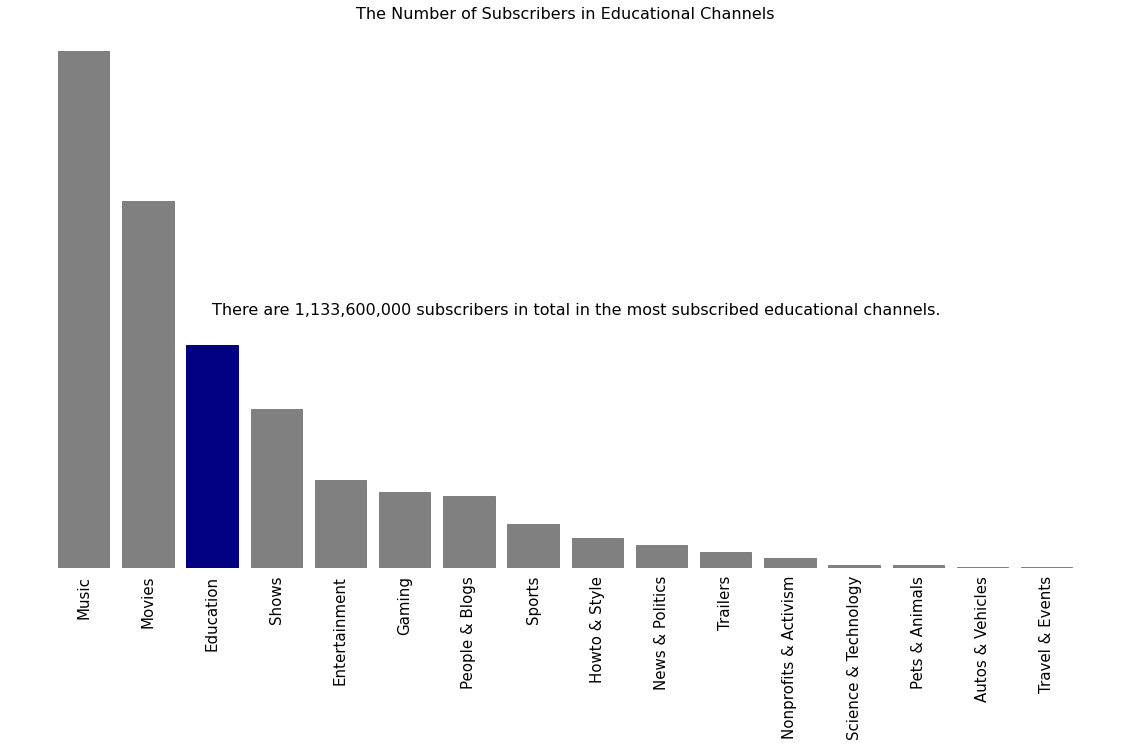

In [ ]:
barlist = bar_chart(category_values, category_counts, '', '')
remove_ticks_and_labels()
remove_frame()
change_bar_colors(barlist, 2)
matplotlib.pyplot.text(2,
                       150,
                       'There are 1,133,600,000 subscribers in total in the most subscribed educational channels.',
                       ha = 'left',
                       fontdict = {'weight': 'normal', 'size': 16})
matplotlib.pyplot.title('The Number of Subscribers in Educational Channels',
                        fontdict = {'weight': 'normal', 'size': 16})
matplotlib.pyplot.show()

----------------
# Second Business Problem

Our client is a researcher and they have defined some tasks for us to analyze. They are doing some research on online free video platforms and earning money from them.

Firstly, they want to understand the trend of youtube channel growth in number, especially they want to see if there is any change during the covid-19.

Since this is a trend, it is best to have a simple line chart.

We need to count the number of channels started in each year.

To aviod clutter, I dropped the border, but not the axis. I printed the number of channels per year on the chart and eliminated *y* axis. To be able to read the information for each year I added the grid lines for the *X* axis.



To have the audience's attention, I printed the maximum number of the channels started in the related year on the chart. Also used different width and color for the pandemic years.



In [ ]:
number_of_channels = youtube.groupby(by = 'Started').count()
number_of_channels.index

Int64Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='Started')

Here I defined a line chart to draw lines in grey and draw some parts of it with a focus, using a thicker line and darker color.

It gets **x** and **y** and the number of where it should start the focus on.

In [ ]:
def line_focus(x, y, focus):
    matplotlib.pyplot.figure(figsize = (10, 5), dpi = 120)
    matplotlib.pyplot.plot(x, y, color = 'lightgray')
    matplotlib.pyplot.plot(x[focus:], y[focus:], color = 'navy', linewidth = 3)
    matplotlib.pyplot.xticks(rotation ='vertical', fontsize = 10)
    matplotlib.pyplot.grid(axis = 'x', color = 'lightgray')

Here after calling our line_chart function we add title and some details for emphasize. To be exact, the number of added channel for each year and a short description for the coivd-19 years.

Also after calling the *remove_frame* function, I added back the *X* axis to have the years using **set_visible** on the bottom spine. So the border is reduced to just the *X* axis.

To have emphasize on just the number of the added channels in pandemic time, I reduced the color of everything else in the chart.

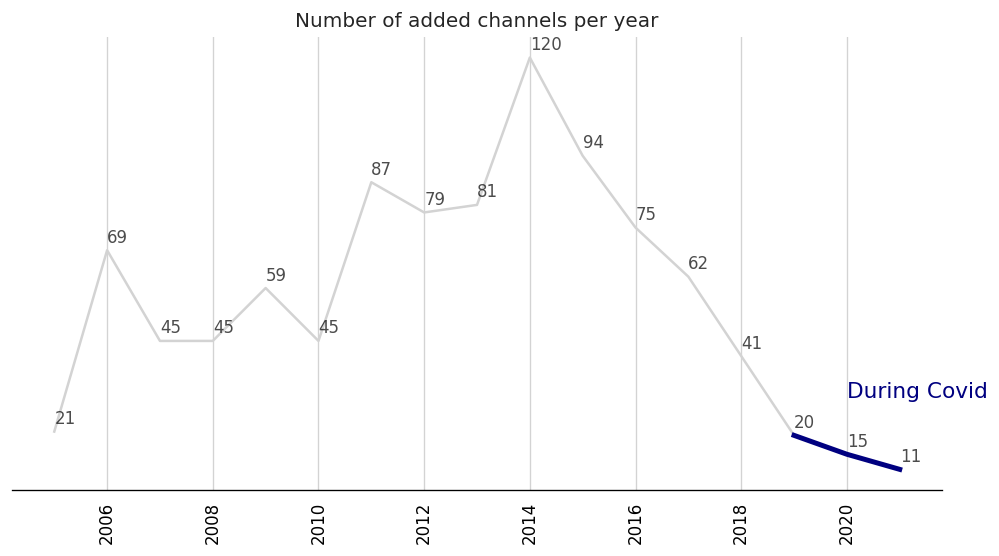

In [ ]:
line_focus(number_of_channels.index, number_of_channels['Rank'], 14)
matplotlib.pyplot.title('Number of added channels per year', alpha = 0.85)
for i, v in zip(number_of_channels.index, number_of_channels['Rank']):
    matplotlib.pyplot.text(i, v+2, v, ha = 'left', color = 'black', alpha = 0.7)
matplotlib.pyplot.text(number_of_channels.index[15],
                       30,
                       'During Covid',
                       ha = 'left',
                       fontdict = {'weight': 'normal', 'size': 13},
                       color = 'navy')
remove_frame()
matplotlib.pyplot.gca().spines['bottom'].set_visible(True)
remove_ticks_and_labels()

- The msot added channels are 120 ones in year 2014. It is the peak for this trend.
- During the pandemic, there is no raise in added numbers of new channels. The descending order continues and does not change.

----------------------
# Third Business Problem

The institute wants to have a better view on the ratio of the top subscribers, the number of subscribers to be exact for the top first and third.

- I have visualizd the ratio of the number of the top subscribers to the whole dataset, and to the top 20. Pie chart is a good choice since we have to show the ratio to a whole part.

- to have emphsize I moved forward different slices a bit using **explode** and also added the values. for some of them up untill three decimal digits.


*I wanted to define a function to draw the pie charts but couldn't apply it on subplots, so just wrote the codes again.*

----------------

I used **nalrgest** method to find the highest numbers in *Subscribers* feature. Then reset the index to have access easily and in order, the old index is not sorted out.

In [ ]:
top_20_subscribers = youtube.nlargest(20, columns = 'Subscribers')
top_20_subscribers = top_20_subscribers.reset_index()
top_20_subscribers

,index,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,0,1,T-Series,234000000,212900271553,18515,Music,2006
1,1,2,YouTube Movies,161000000,0,0,Movies,2015
2,2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,3,4,SET India,150000000,137828094104,103200,Shows,2006
4,4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
5,6,7,PewDiePie,111000000,28851883250,4694,Gaming,2010
6,7,8,✿ Kids Diana Show,106000000,86638570921,1056,People & Blogs,2015
7,8,9,Like Nastya,104000000,87202935675,754,People & Blogs,2016
8,10,11,WWE,92800000,73577695222,66174,Sports,2007
9,11,12,Vlad and Niki,92700000,72444118381,520,Entertainment,2018


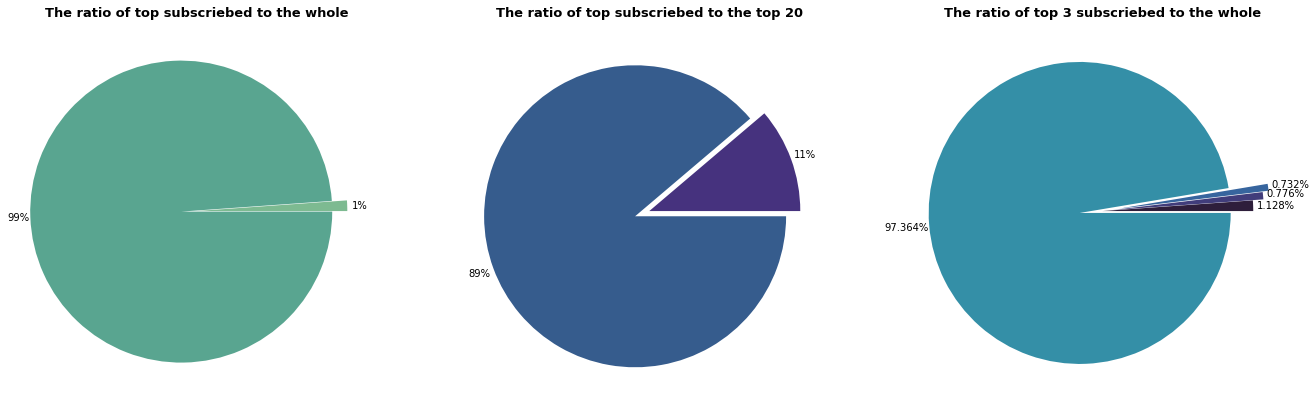

<Figure size 1650x750 with 0 Axes>

In [ ]:
fig, ax = matplotlib.pyplot.subplots(1, 3, figsize = (23, 10))
matplotlib.pyplot.figure(figsize = (11, 5), dpi = 150)

top = top_20_subscribers['Subscribers'].iloc[0]
total_1 = youtube['Subscribers'].sum() - top
in_total = [top, total_1]
ax[0].pie(in_total, explode = (0, 0.1),
         colors = seaborn.color_palette('crest'),
         autopct = '%1.0f%%',
         pctdistance = 1.08)
ax[0].set_title('The ratio of top subscriebed to the whole', fontdict = {'weight': 'bold', 'size': 13})

top_20_total = top_20_subscribers['Subscribers'].sum() - top
in_top_20 = [top, top_20_total]
ax[1].pie(in_top_20, explode = (0, 0.1),
         colors = seaborn.color_palette('viridis'),
         autopct = '%1.0f%%',
         pctdistance = 1.1)
ax[1].set_title('The ratio of top subscriebed to the top 20', fontdict = {'weight': 'bold', 'size': 13})

top_3 = top_20_subscribers['Subscribers'].iloc[0 : 3]
total_3 = youtube['Subscribers'].sum() - top_3.sum()
top_3[3] = total_3
ax[2].pie(top_3,
         colors = seaborn.color_palette('mako'),
         explode = (0.0, 0.07, 0.11, 0.15),
         autopct = '%1.3f%%',
         pctdistance = 1.15)
ax[2].set_title('The ratio of top 3 subscriebed to the whole', fontdict = {'weight': 'bold', 'size': 13})

matplotlib.pyplot.show()

----------------
# Fourth Business Problem

The institute wishes to know about any knd of relationship between the number of subscribers and the number os videos uploaded in the channel.

We can use the top three in both *number of videos* and *number of subscribers* and compare them. In comparison matters, bars hel a lot. I choose a *Horizontal Bar* with two different colors for the two. They are drawn next to each other because the name of the channels are different in them.

- To have less clutter we can eliminate the axis
- We also dont need the counts of them. The visual is enough for comparison
- Since non of the two tripple bars are supposed to be emphasised, I just had them in simmilar colors but one is darker and than the other one to have it visible for a color-blind audience.
- In the empty space I added the result of the comparison.

In [ ]:
non_zero_subscribers = youtube.drop(youtube[youtube['Video Count'] == 0].index)
non_zero_subscribers = youtube.drop(youtube[youtube['Video Views'] == 0].index)
top_3_subscribers = non_zero_subscribers.nlargest(3, columns = 'Subscribers')
top_3_subscribers

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006


In [ ]:
top_3_videos = non_zero_subscribers.nlargest(3, columns = 'Video Count')
top_3_videos = top_3_videos.drop('Rank', axis = 1)
top_3_videos.reset_index(inplace = True)
top_3_videos

,index,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,820,GMA News,12800000,11220255933,342802,News & Politics,2007
1,109,IndiaTV,33600000,14728724777,254217,News & Politics,2006
2,101,ABP NEWS,35100000,11605665353,253628,People & Blogs,2012


For each bar I added the name of the channel which is not the same for the to three in videos and subscriptions.

Using **text** method in pyplot I gave the position, the text, alignment, and color of the text, matching with the color of the bars.

Because in our function for removing ticks and labels we didn't remove them for the *X* axis, I had to do it here manually after calling the function using the *tick_params* method.

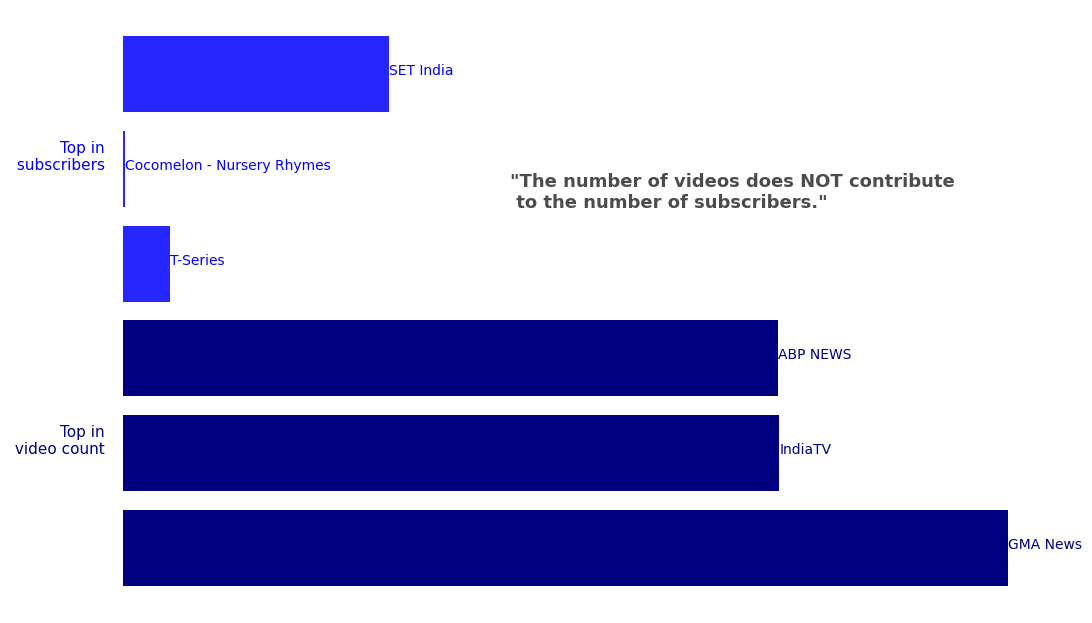

In [ ]:
matplotlib.pyplot.figure(figsize = (12, 8), dpi = 100)
matplotlib.pyplot.xticks(rotation ='vertical')
matplotlib.pyplot.barh(top_3_videos['Youtube Channel'], top_3_videos['Video Count'], color = 'navy')
for i, v in zip(top_3_videos['Youtube Channel'], top_3_videos['Video Count']):
    matplotlib.pyplot.text(v, i, i, ha ='left', color = 'navy')
matplotlib.pyplot.text(-5000, 1, 'Top in \n video count ', ha = 'right', color = 'navy', fontdict = {'weight': 'normal', 'size': 11})

matplotlib.pyplot.barh(top_3_subscribers['Youtube Channel'], top_3_subscribers['Video Count'], color = 'blue', alpha = 0.85)
for i, v in zip(top_3_subscribers['Youtube Channel'], top_3_subscribers['Video Count']):
    matplotlib.pyplot.text(v, i, i, ha = 'left', color = 'blue')
matplotlib.pyplot.text(-5000, 4, 'Top in \n subscribers ', ha = 'right', color = 'blue', fontdict = {'weight': 'normal', 'size': 11})

matplotlib.pyplot.text(x = 150000,
                       y = 3.6,
                       s = '"The number of videos does NOT contribute \n to the number of subscribers."',
                       color = 'black',
                       alpha = 0.7,
                       verticalalignment = 'baseline',
                       fontdict = {'weight': 'bold', 'size': 13})

remove_frame()
remove_ticks_and_labels()
matplotlib.pyplot.tick_params(axis = 'x', labelbottom = False)
matplotlib.pyplot.show()

As it is obvious, the number of videos on a channel does not mean they have the most number of subscribers.

# Conlusion and Suggestions

In conclusion, we see that there are some youtube channels that have differnet contents with great number of subscribers. The top favorite category among youtubers is **Music**, the top subscribed channel is **T-series**, and the most number of videos belong to **GMA News**. This dataset is very well gathered with valuable features.

Though, there are some issues that can be improved.
- This dataset contained outliers and information that we eliminated because it was not relevant, like the link instead of a category.
- It could also help the research intitutions to analyse the gender and age of the subscribers and youtubers themeselves.
- More featured categories could contribute to a more detailed analysis. For example in *education category* and the exact teaching material.
- Number of searches also could help us analyze different areas and issues.


# Refferences

- Digital Ocean website (2023) Available at: [https://www.digitalocean.com/community/tutorials](https://www.digitalocean.com/community/tutorials) (Accessed: 01/03/2023)
- kaggle website (2023) Most Subscribed 1000 Youtube channels. Availabel at: [https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels](https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels) (Accessed: 01/03/2023)
- Matplotlib website (2023) Available at:[https://matplotlib.org/](https://matplotlib.org/) (Accessed: 20/02/2023)
- Medium website (2023) Available at: [https://medium.com](https://medium.com) (Accessed: 23/02/2023)
- Pandas website (2023) Available at: [https://pandas.pydata.org/docs](https://pandas.pydata.org/docs) (Accessed: 20/02/2023)
- Plotly website (2023) Available at: [https://plotly.com/python](https://plotly.com/python) (Accessed: 20/02/2023)
- Python Graph gallery website (2023) Control color in seaborn heatmaps. Available at: [https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps](https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps) (Accessed: 20/02/2023)
- Seaborn website (2023) Color Palettes. Available at: [https://seaborn.pydata.org/tutorial/color_palettes.html](https://seaborn.pydata.org/tutorial/color_palettes.html) (Accessed: 02/03/2023)
- Stackoverflow website (2023) Questions, Available at: [https://stackoverflow.com/questions/](https://stackoverflow.com/questions/) (Accessed: 13/03/2023)

# Submision Form

In [ ]:
import IPython.display


image_address = '/content/assessment pic.jpg'
IPython.display.Image(image_address)

In [ ]:
!jupyter nbconvert --to html youtube_visualization.ipynb